In [1]:
import warnings
warnings.filterwarnings("ignore")


import requests

import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

from datetime import datetime

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit 

from wrangle import get_crypto_price


In [2]:
btc = get_crypto_price('btc', '2018-01-01', '2022-12-12')

In [3]:
train = btc[:'2020']
validate = btc['2021']
test = btc['2022']

col = 'btc_volume'

In [4]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


In [5]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [6]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)


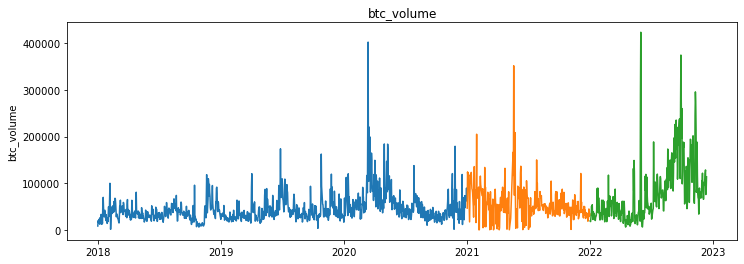

In [8]:
#for col in train.columns:
plt.figure(figsize=(12,4))
plt.plot(train[col])
plt.plot(validate[col])
plt.plot(test[col])
plt.ylabel(col)
plt.title(col)
plt.show()


# Last Observed Value

In [9]:
volume = train['btc_volume'][-1:][0]

yhat_df = pd.DataFrame({'btc_volume': [volume]}, 
                       index = validate.index)

yhat_df.head()

,btc_volume
date,
2021-01-01,62421.605878
2021-01-02,62421.605878
2021-01-03,62421.605878
2021-01-04,62421.605878
2021-01-05,62421.605878


btc_volume -- RMSE: 36122


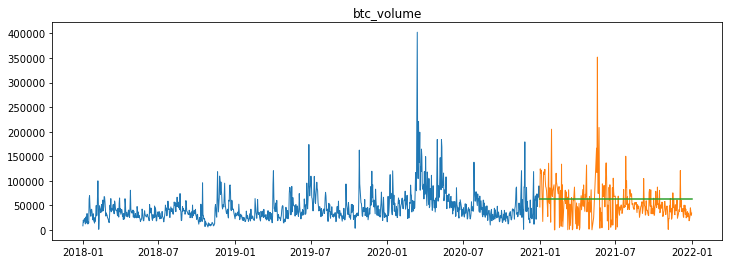

In [10]:
plot_and_eval(col)

In [11]:
#for col in train.columns:
eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)


In [12]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,btc_volume,36122.0


# Simple Average

In [13]:
volume = round(train['btc_volume'].mean(), 2)


yhat_df = pd.DataFrame({'btc_volume': [volume]}, 
                       index = validate.index)

yhat_df.head()


,btc_volume
date,
2021-01-01,44901.11
2021-01-02,44901.11
2021-01-03,44901.11
2021-01-04,44901.11
2021-01-05,44901.11


btc_volume -- RMSE: 36649


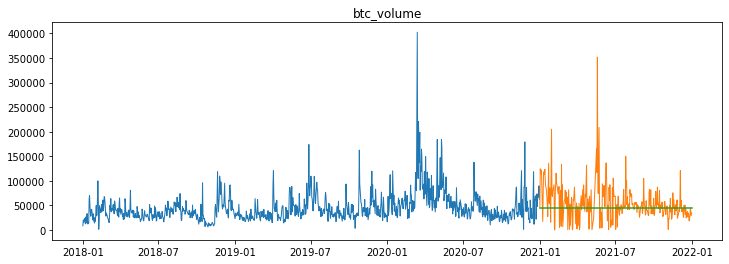

In [14]:
plot_and_eval(col)

In [15]:
eval_df = append_eval_df(model_type='simple_average', 
                             target_var = col)
eval_df

,model_type,target_var,rmse
0,last_observed_value,btc_volume,36122.0
1,simple_average,btc_volume,36649.0


# Moving Average

In [16]:
period = 30
volume = round(train['btc_volume'].rolling(period).mean().iloc[-1], 2)


yhat_df = pd.DataFrame({'btc_volume': [volume]}, 
                       index = validate.index)

yhat_df.head()

,btc_volume
date,
2021-01-01,50172.69
2021-01-02,50172.69
2021-01-03,50172.69
2021-01-04,50172.69
2021-01-05,50172.69


btc_volume -- RMSE: 35595


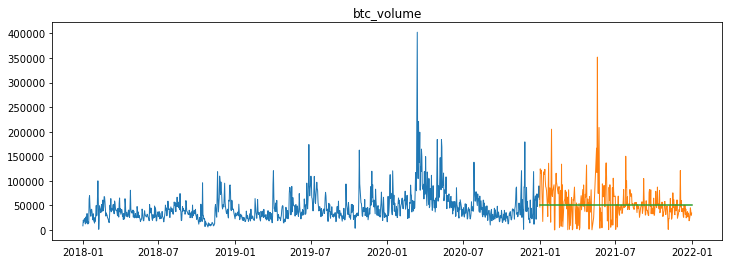

In [17]:
plot_and_eval(col)

In [18]:
eval_df = append_eval_df(model_type='30d_moving_average', 
                             target_var = col)
eval_df

,model_type,target_var,rmse
0,last_observed_value,btc_volume,36122.0
1,simple_average,btc_volume,36649.0
2,30d_moving_average,btc_volume,35595.0
